<p style="background-color:#198D4B;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Project - Spotify Songs</b></p>

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Spotify_logo_with_text.svg/2560px-Spotify_logo_with_text.svg.png" width="400" height="400"/>
</div>

# <font color='#24C06A'> <b>Introduction</b><font color='black'> 

In this project, data analysis and visualization techniques were applied to explore various metrics related to the music industry. **The dataset used in this analysis was specifically generated by ChatGPT and does not represent real-world data.** Therefore, the findings from this analysis do not reflect the actual state of the music industry; instead, they serve to demonstrate data analysis skills and the application of visualization techniques.

This study aims to highlight the importance of data preparation and visualization steps in the analytical thinking process, as well as to provide an example of how basic analyses on music data can be conducted. While the findings offer insights into the music industry structure, it is important to remember that the data is fictional.

<font color='#24C06A'> <b>Contains:</b><font color='black'> 
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#organizing-columns">Organizing Columns</a></li>
<li><a href="#nan-values">NaN Values</a></li>
<li><a href="#data-visualization">Data Visualization</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='import-library'></a>
# <font color='#24C06A'> <b>Importing Libraries</b><font color='black'> 

In [732]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='#24C06A'> <b>Loading The Dataset</b><font color='black'> 

In [734]:
df0 = pd.read_csv("spotify_songs_dataset.csv")
df = df0.copy()

In [735]:
df.head()

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN


In [736]:
df.sample(5)

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
7358,SP7359,Law education hospital.,Jeffery Carlson,Down politics.,Electronic,1997-10-10,236.0,94,81122258,Japanese,Yes,Sony Music,Timothy Moore,Samantha Johnston,NaN
42069,SP42070,Respond air which.,Alexander Powell,Mouth.,Electronic,2007-05-10,265.0,70,49055590,English,Yes,Sony Music,Michael Morgan,Henry Cook,NaN
5727,SP5728,Five entire.,Shawn Richardson,There.,Pop,2013-06-20,305.0,78,96592182,Japanese,Yes,Def Jam,Norman Patel,Erica Gordon,NaN
4982,SP4983,Provide far.,Richard Lewis,Language personal.,Classical,2007-08-20,220.0,36,97754373,English,Yes,Universal Music,Christine Conrad MD,Andrea Richardson,NaN
718,SP0719,Commercial place.,Mary Adams,Truth.,Folk,2016-06-05,239.0,67,50992918,English,No,Indie,Kevin Lane,Ashley Smith,Kenneth Simmons


<a id='understanding-dataset'></a>
# <font color='#24C06A'> <b>Understanding The Dataset</b><font color='black'> 

 - **song_id:** The unique identifier for the song.
 - **song_title:** The title of the song.
 - **artist:** The artist performing the song.
 - **album:** The album where the song is featured.
 - **genre:** The music genre of the song.
 - **release_date:** The release date of the song.
 - **duration:** The duration of the song (in seconds).
 - **popularity:** The popularity score of the song (1-100).
 - **stream:** The total number of streams for the song.
 - **language:** The language of the song.
 - **explicit_content:** Whether the song contains explicit content (e.g., inappropriate language).
 - **label:** The record label that published the song.
 - **composer:** The composer of the song.
 - **producer:** The producer of the song.
 - **collaboration:** Whether the song is a collaboration with other artists.

In [739]:
df.shape

(50000, 15)

In [740]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           50000 non-null  object 
 1   song_title        50000 non-null  object 
 2   artist            50000 non-null  object 
 3   album             50000 non-null  object 
 4   genre             50000 non-null  object 
 5   release_date      50000 non-null  object 
 6   duration          45000 non-null  float64
 7   popularity        50000 non-null  int64  
 8   stream            50000 non-null  int64  
 9   language          47500 non-null  object 
 10  explicit_content  50000 non-null  object 
 11  label             50000 non-null  object 
 12  composer          50000 non-null  object 
 13  producer          50000 non-null  object 
 14  collaboration     15000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 5.7+ MB


In [741]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,45000.0,2.396592e+02,5.013673e+01,33.0,206.0,240.0,273.0,433.0
popularity,50000.0,5.078344e+01,2.894875e+01,1.0,26.0,51.0,76.0,100.0
stream,50000.0,5.019183e+07,2.893624e+07,1899.0,25233107.5,50421686.0,75190637.5,99999128.0


In [742]:
df.describe(include= "object").T

,count,unique,top,freq
song_id,50000,50000,SP0001,1
song_title,50000,46396,Fund.,12
artist,50000,40182,Michael Smith,23
album,50000,26162,Success.,45
genre,50000,9,Electronic,12568
release_date,50000,10853,2003-05-01,15
language,47500,7,English,33299
explicit_content,50000,2,Yes,25083
label,50000,6,Def Jam,8501
composer,50000,40314,Michael Smith,21


In [743]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 50000  │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 15     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃      ┃      ┃          ┃          ┃      ┃          ┃          ┃          ┃           ┃        ┃  │
│ ┃ me        ┃ NA   ┃ NA % ┃ mean     ┃ sd       ┃ p0   ┃ p25      ┃ p50      ┃ p75      ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ duration  │ 5000 │   10 │    239.7 │    50.14 │   33 │      206 │      240 │      273 │       433 │  ▁▇▇▂  │  │
│ │ popularit │    0 │    0 │    50.78 │    28.95 │    1 │       26 │       51 │       76 │       100 │ ▇▇▇▇▇▇ │  │
│ │ y         │      │      │          │          │      │          │          │          │           │        │  │
│ │ stream    │    0 │    0 │ 50190000 │ 28940000 │ 1899 │ 25230000 │ 50420000 │ 75190000 │ 100000000 │ ▇▇▇▇▇▇ │  │
│ └───────────┴──────┴──────┴──────────┴──────────┴──────┴──────────┴──────────┴──────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                    ┃ NA          ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ song_id                        │           0 │         0 │                        1 │                50000 │  │
│ │ song_title                     │           0 │         0 │                      2.5 │               125277 │  │
│ │ artist                         │           0 │         0 │                        2 │               102234 │  │
│ │ album                          │           0 │         0 │                      1.5 │                75516 │  │
│ │ genre                          │           0 │         0 │                        1 │                50000 │  │
│ │ release_date                   │           0 │         0 │                        1 │                50000 │  │
│ │ language                       │        2500 │         5 │                     0.95 │                47500 │  │
│ │ explicit_content               │           0 │         0 │                        1 │                50000 │  │
│ │ label                          │           0 │         0 │                      1.8 │                91589 │  │
│ │ composer                       │           0 │         0 │                        2 │               102220 │  │
│ │ producer                       │           0 │         0 │                        2 │               102154 │  │
│ │ collaboration                  │       35000 │      

In [744]:
df.duplicated().sum()

0

In [745]:
df.isnull().sum()

song_id                 0
song_title              0
artist                  0
album                   0
genre                   0
release_date            0
duration             5000
popularity              0
stream                  0
language             2500
explicit_content        0
label                   0
composer                0
producer                0
collaboration       35000
dtype: int64

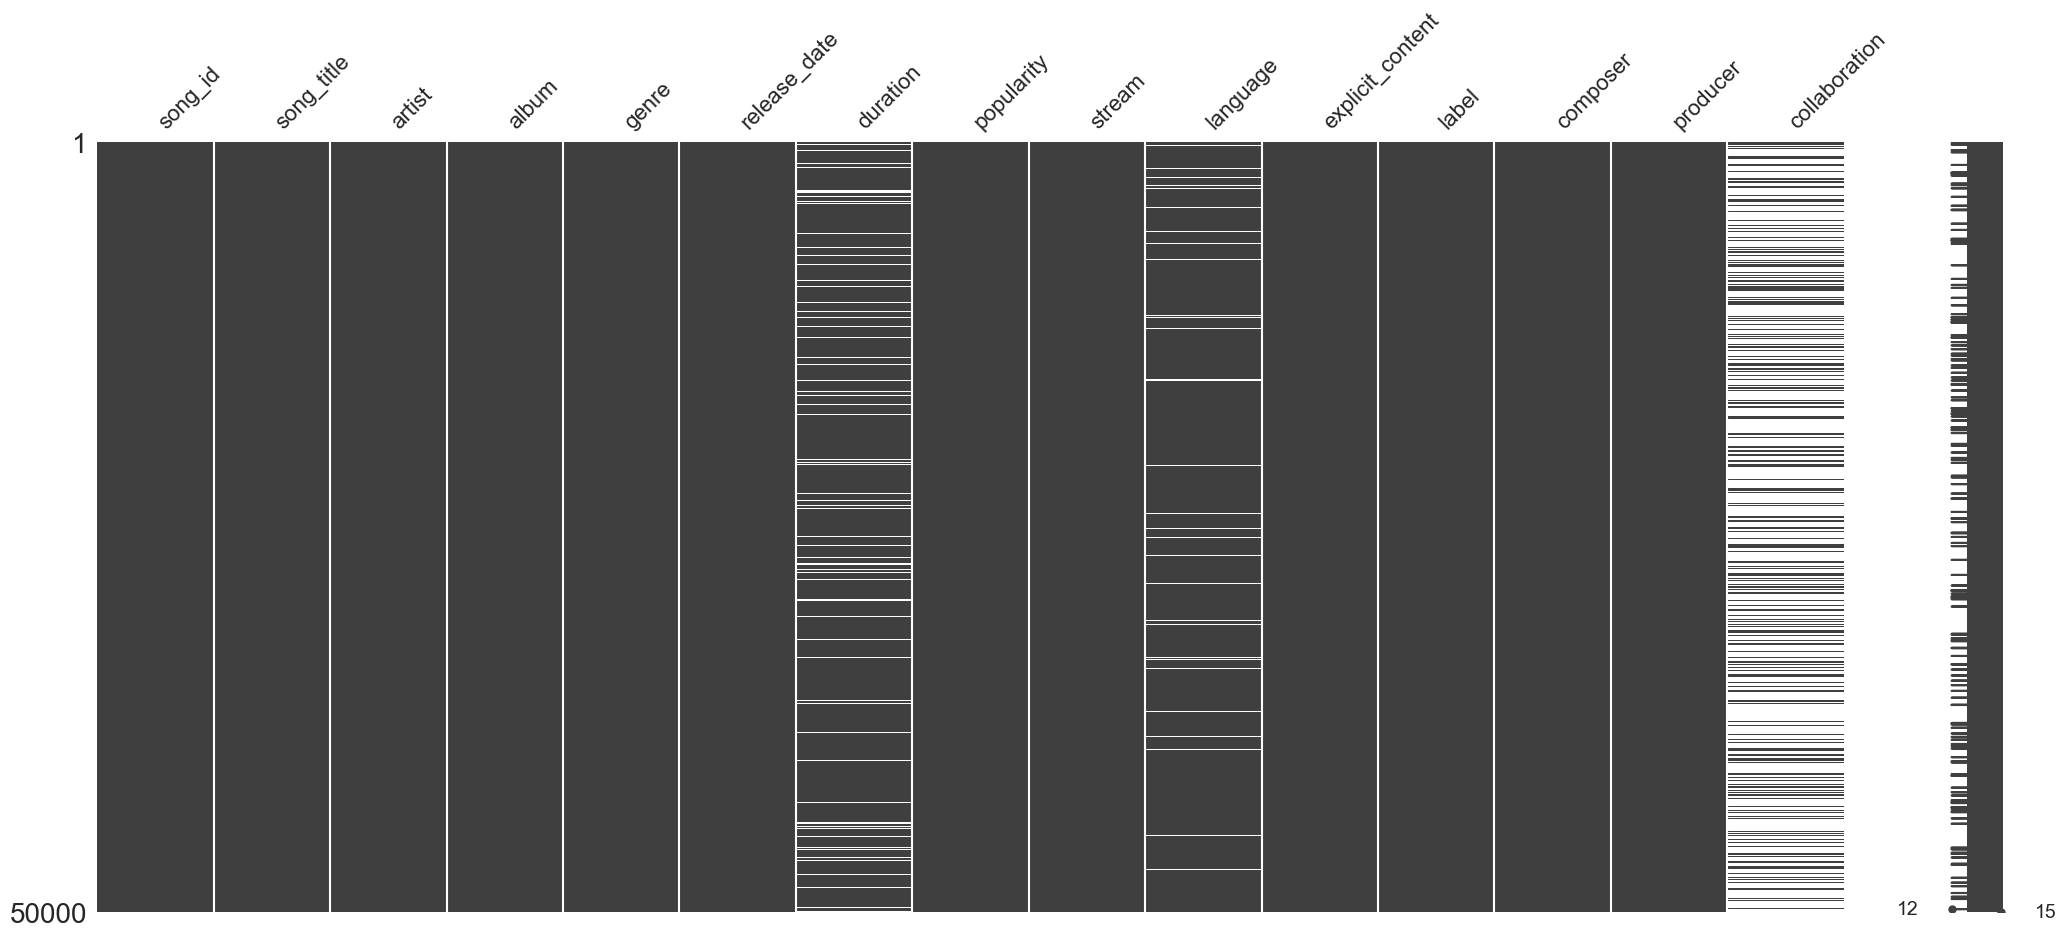

In [746]:
msno.matrix(df);

<a id='organizing-columns'></a>
# <font color='#24C06A'> <b>Organizing Columns</b><font color='black'> 

In [748]:
df.columns

Index(['song_id', 'song_title', 'artist', 'album', 'genre', 'release_date',
       'duration', 'popularity', 'stream', 'language', 'explicit_content',
       'label', 'composer', 'producer', 'collaboration'],
      dtype='object')

## <font color='#31DA7A'> <b>"song_title" Column</b><font color='black'> 

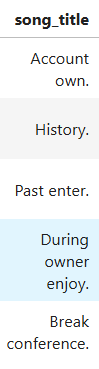

**There are dots (.) at the end of the song titles. Let's remove these dots.**

In [751]:
df["song_title"] = df["song_title"].str.strip('.')

Also capitalize the first letters of all words in the song titles.

In [753]:
df["song_title"] = df["song_title"].str.title()

In [754]:
df.song_title.nunique()

46396

In [755]:
df.song_title.dtype

dtype('O')

## <font color='#31DA7A'> <b>"artist" Column</b><font color='black'> 

In [757]:
df.artist.nunique()

40182

In [758]:
df.artist.dtype

dtype('O')

## <font color='#31DA7A'> <b>"album" Column</b><font color='black'> 

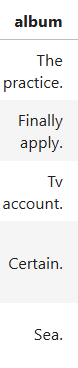

**There are dots (.) at the end of the album names. Let's remove these dots too.**

In [761]:
df["album"] = df["album"].str.strip('.')

Also capitalize the first letters of all words in the album names too.

In [763]:
df["album"] = df["album"].str.title()

## <font color='#31DA7A'> <b>"genre" Column</b><font color='black'> 

In [765]:
df.genre.nunique()

9

In [766]:
df.genre.unique()

array(['Electronic', 'Pop', 'Hip-Hop', 'Folk', 'R&B', 'Jazz', 'Classical',
       'Country', 'Reggae'], dtype=object)

## <font color='#31DA7A'> <b>"release_date" Column</b><font color='black'> 

In [768]:
df.release_date.dtype

dtype('O')

In [769]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [770]:
df.release_date.dtype

dtype('<M8[ns]')

## <font color='#31DA7A'> <b>"duration" Column</b><font color='black'> 

In [772]:
df.duration.nunique()

366

In [773]:
df.duration.unique()

array([282., 127.,  nan, 214., 273., 312., 336., 237., 216., 161., 345.,
       131., 231., 230., 280., 129., 314., 173., 293., 256., 186., 271.,
       274., 323., 188., 211., 288., 260., 184., 194., 201., 246., 319.,
       196., 238., 110., 223., 150., 240., 252., 234., 267., 324., 382.,
       268., 299., 249., 242., 243., 316., 159., 241., 300., 347., 185.,
       169., 207., 205., 278., 235., 263., 204., 158.,  94., 208., 220.,
       179., 247., 176., 285., 259., 261., 149., 250., 136., 193., 217.,
       289., 258., 359., 275., 295., 180., 257., 266., 244., 222., 190.,
       224., 301., 302., 287., 292., 236., 254., 227., 233., 352., 177.,
       283., 290., 239., 202., 294., 183., 269., 272., 318., 141., 198.,
       182., 277., 174., 221., 191., 305., 335., 308., 212., 232., 297.,
       317., 265., 155., 181., 276., 327., 166., 311., 248., 322., 213.,
       206., 178., 270., 262., 368., 228., 219., 215., 255., 199., 151.,
       304., 195., 281., 245., 279., 329., 172., 33

After filling the NaN values in the duration column we'll change the dtype of the column from float to integer.

## <font color='#31DA7A'> <b>"popularity" Column</b><font color='black'> 

The popularity score must be between 1 and 100. Accordingly, let's check if there are wrong values.

In [777]:
df.popularity.min()

1

In [778]:
df.popularity.max()

100

In [779]:
df.popularity.nunique()

100

In [780]:
df.popularity.dtype

dtype('int64')

"popularity" column seems OK for now.

## <font color='#31DA7A'> <b>"stream" Column</b><font color='black'> 

In [783]:
df.stream.nunique()

49989

In [784]:
df.stream.dtype

dtype('int64')

"stream" column seems OK for now.

## <font color='#31DA7A'> <b>"language" Column</b><font color='black'> 

In [787]:
df.language.nunique()

7

In [788]:
df.language.unique()

array(['English', nan, 'Japanese', 'Spanish', 'German', 'French',
       'Korean', 'Italian'], dtype=object)

After filling the NaN values in the language column we'll change the dtype of the column from object to string or category.

## <font color='#31DA7A'> <b>"explicit_content" Column</b><font color='black'> 

In [791]:
df.explicit_content.nunique()

2

In [792]:
df.explicit_content.unique()

array(['Yes', 'No'], dtype=object)

"explicit_content" column seems OK for now.

## <font color='#31DA7A'> <b>"label" Column</b><font color='black'> 

In [795]:
df.label.nunique()

6

In [796]:
df.label.unique()

array(['Def Jam', 'Universal Music', 'Sony Music', 'Indie',
       'Atlantic Records', 'Warner Music'], dtype=object)

"label" column seems OK for now.

## <font color='#31DA7A'> <b>"composer" Column</b><font color='black'> 

In [799]:
df.composer.nunique()

40314

In [800]:
df.composer.dtype

dtype('O')

"composer" column seems OK for now.

## <font color='#31DA7A'> <b>"producer" Column</b><font color='black'> 

In [803]:
df.producer.nunique()

40304

In [804]:
df.producer.dtype

dtype('O')

"producer" column seems OK for now.

## <font color='#31DA7A'> <b>"collaboration" Column</b><font color='black'> 

In [807]:
df.collaboration.nunique()

13737

In [808]:
df.collaboration.dtype

dtype('O')

<a id='nan-values'></a>
# <font color='#24C06A'> <b>NaN Values</b><font color='black'> 

In [810]:
df.isnull().sum()

song_id                 0
song_title              0
artist                  0
album                   0
genre                   0
release_date            0
duration             5000
popularity              0
stream                  0
language             2500
explicit_content        0
label                   0
composer                0
producer                0
collaboration       35000
dtype: int64

## <font color='#31DA7A'> <b>NaN Values In "duration" Column</b><font color='black'> 

In [812]:
df.duration.isnull().sum()

5000

In [813]:
df.duration.mean()

239.65917777777778

In [814]:
df.duration.median()

240.0

In [815]:
df.groupby("genre")["duration"].mean().round(0)

genre
Classical     239.0
Country       239.0
Electronic    240.0
Folk          240.0
Hip-Hop       240.0
Jazz          240.0
Pop           239.0
R&B           240.0
Reggae        241.0
Name: duration, dtype: float64

In [816]:
df['duration'] = df['duration'].fillna(df.groupby('genre')['duration'].transform('mean').round(0))

In [817]:
df.duration.isnull().sum()

0

## <font color='#31DA7A'> <b>NaN Values In "language" Column</b><font color='black'> 

In [819]:
df.language.isnull().sum()

2500

In [820]:
df.language.mode()[0]

'English'

In [821]:
df.groupby('genre')['language'].value_counts()

genre       language
Classical   English     1720
            Spanish      258
            French       105
            Korean       104
            Italian       99
            German        71
            Japanese      70
Country     English     1681
            Spanish      218
            French       112
            Korean       112
            Italian      103
            Japanese      85
            German        78
Electronic  English     8352
            Spanish     1183
            French       662
            Korean       581
            Italian      460
            German       343
            Japanese     319
Folk        English     1688
            Spanish      241
            Korean       135
            French       116
            Italian       94
            German        80
            Japanese      68
Hip-Hop     English     8178
            Spanish     1156
            French       592
            Korean       581
            Italian      466
            Japanese  

In [822]:
df['language'] = df['language'].fillna(df.groupby('genre')['language'].transform(lambda x: x.mode()[0]))

In [823]:
df.language.isnull().sum()

0

## <font color='#31DA7A'> <b>NaN Values In "collaboration" Column</b><font color='black'> 

In [825]:
df.collaboration.isnull().sum()

35000

This dataset was created by **ChatGPT**. Therefore, there is value in the collaboration column if collaboration was done. **If there was no collaboration, the rows were entered as NaN values.** That's why it would be more meaningful to fill NaN values ​​as **"No Collaboration"**.

In [827]:
df["collaboration"] = df["collaboration"].fillna("No Collaboration")

In [828]:
df.collaboration.isnull().sum()

0

In [829]:
# after filling the NaN values
df.isnull().sum()

song_id             0
song_title          0
artist              0
album               0
genre               0
release_date        0
duration            0
popularity          0
stream              0
language            0
explicit_content    0
label               0
composer            0
producer            0
collaboration       0
dtype: int64

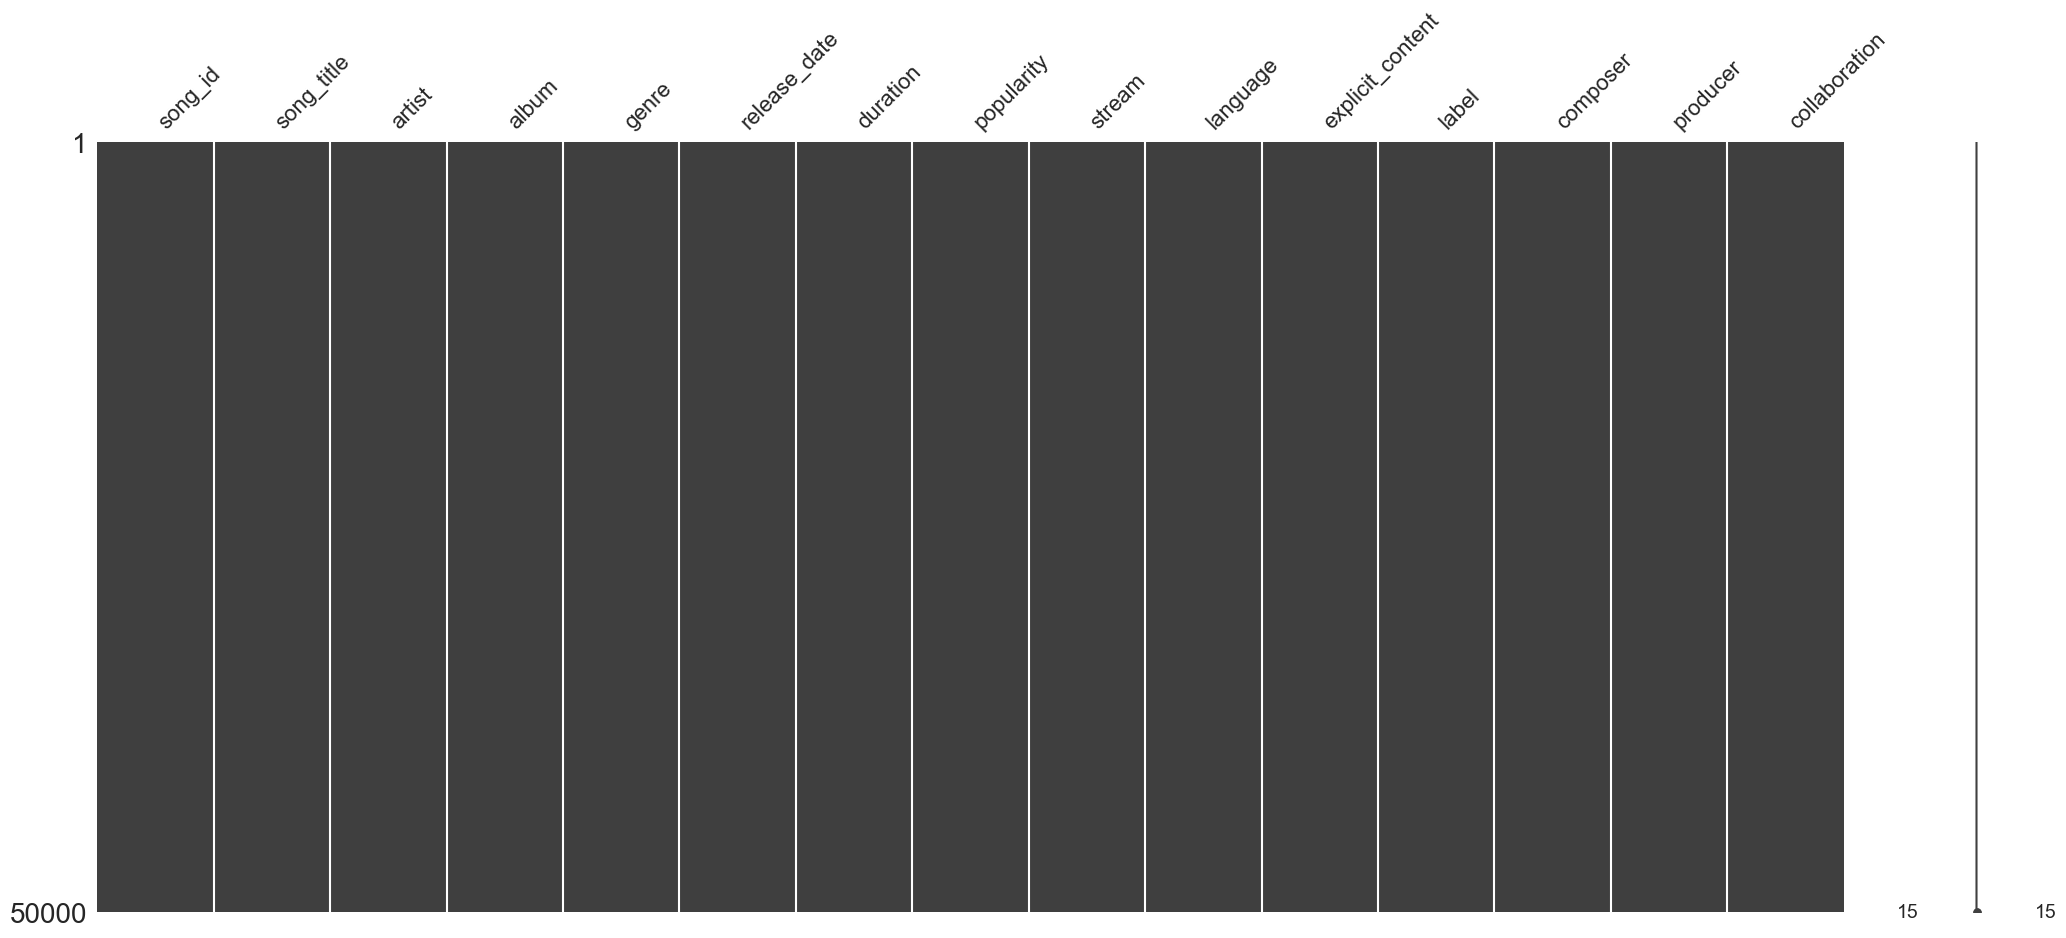

In [830]:
msno.matrix(df);

<a id='data-visualization'></a>
# <font color='#24C06A'> <b>Data Visualization</b><font color='black'> 

In [832]:
# Define a pastel color palette (including greens and complementary pastel colors)
colors = ['#A3D2A3', '#E6B3B3', '#C7E1A6', '#B3E0E0', '#A0D7D7', '#C2C7E1', '#D9E1C3', '#A3C1AD', '#A2D6A6', '#B3E5BB']

## <font color='#31DA7A'> <b>Distribution of Music Genres</b><font color='black'> 

In [834]:
genre_counts = df.genre.value_counts()
genre_counts

genre
Electronic    12568
Pop           12534
Hip-Hop       12298
Folk           2559
Classical      2542
Country        2511
Jazz           2504
R&B            1513
Reggae          971
Name: count, dtype: int64

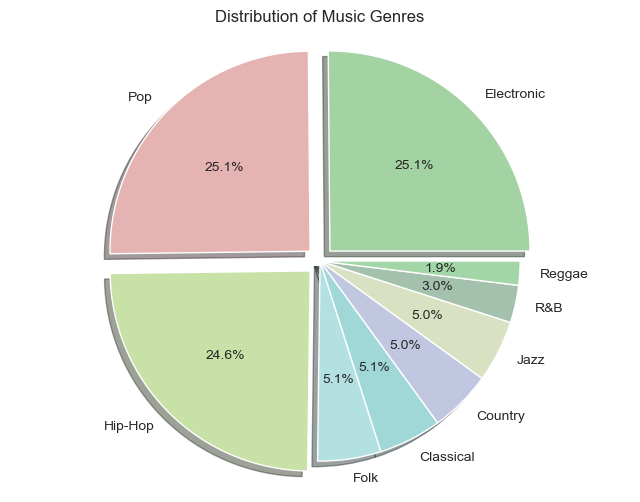

In [835]:
# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(genre_counts,
        labels=genre_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        shadow= True,
        explode= [0.07, 0.07, 0.07, 0, 0, 0, 0, 0, 0]
       )

plt.title('Distribution of Music Genres')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.show()

The chart provides insights into listener preferences and production trends across genres. **Pop music, dominating at 26.1%**, suggests a wide audience reach and a significant share in the music market. **Hip Hop (24.4%)** and **Dance/Electronic (23.3%)** are also prominent, possibly reflecting a strong appeal to younger demographics. Genres like Gospel, Reggae, and Country show lower representation, implying that they cater to niche audiences or are less prevalent globally.

## <font color='#31DA7A'> <b>Distribution of Songs' Durations</b><font color='black'> 

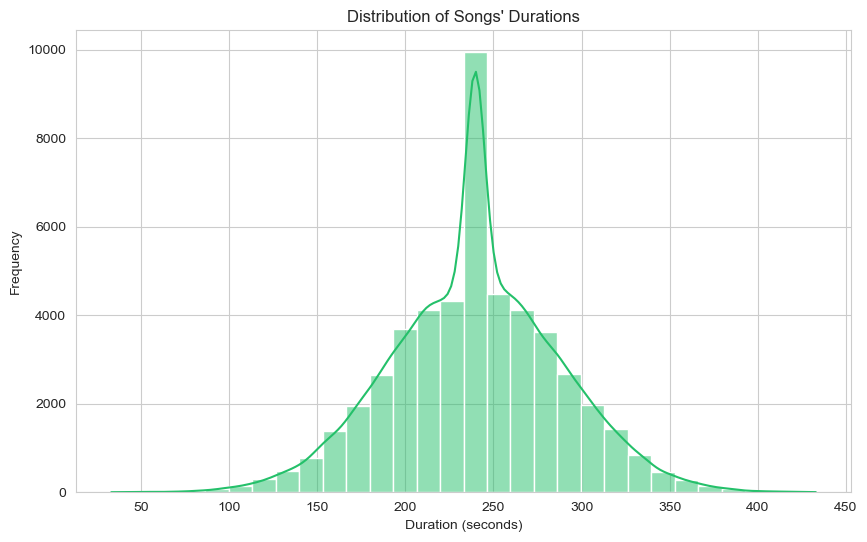

In [838]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=30, kde=True, color= "#24C06A")

plt.title("Distribution of Songs' Durations")
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

plt.show()

The histogram shows a near-normal distribution, with average song durations clustered between **200-250 seconds**, indicating that a typical song lasts 3-4 minutes. This duration appears optimal for retaining listener interest while delivering a strong emotional impact. **The rarity of extremely short or long songs hints at a standardized approach in the industry, aligning with listener attention spans and streaming platform algorithms.**

## <font color='#31DA7A'> <b>Average Popularity by Genre</b><font color='black'> 

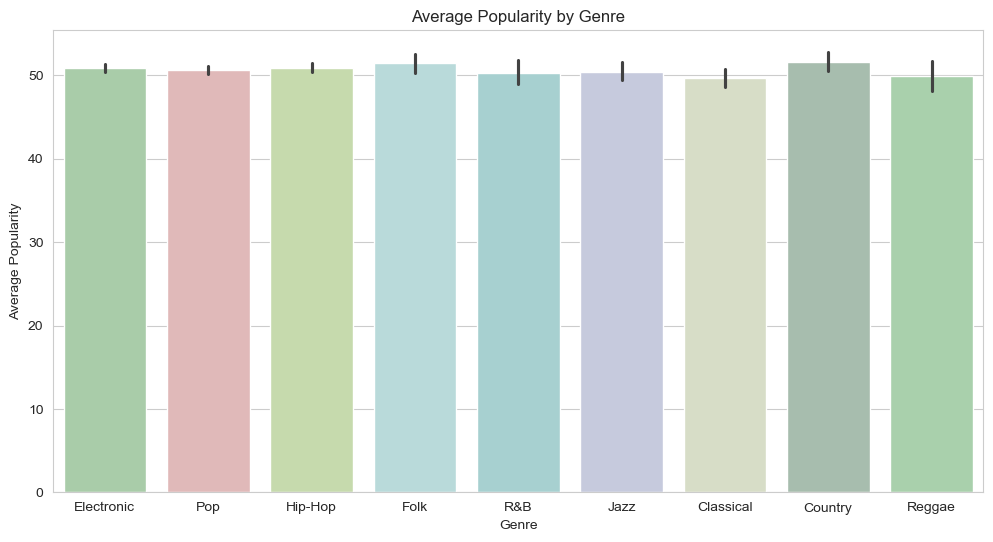

In [841]:
plt.figure(figsize=(12, 6))
sns.barplot(x='genre',
            y='popularity',
            data=df,
            estimator='mean',
            palette= colors
           )

plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')

plt.show()

The differences in average popularity across genres are **minimal**, yet **Pop, Dance, and Hip Hop** show slightly **higher popularity levels**. This trend suggests these genres may be more shared and consumed on digital platforms and social media, reflecting their appeal in popular culture, particularly among younger users. Meanwhile, other genres still hold notable popularity, highlighting a diversification in music tastes.

## <font color='#31DA7A'> <b>Number of Songs Released per Year</b><font color='black'> 

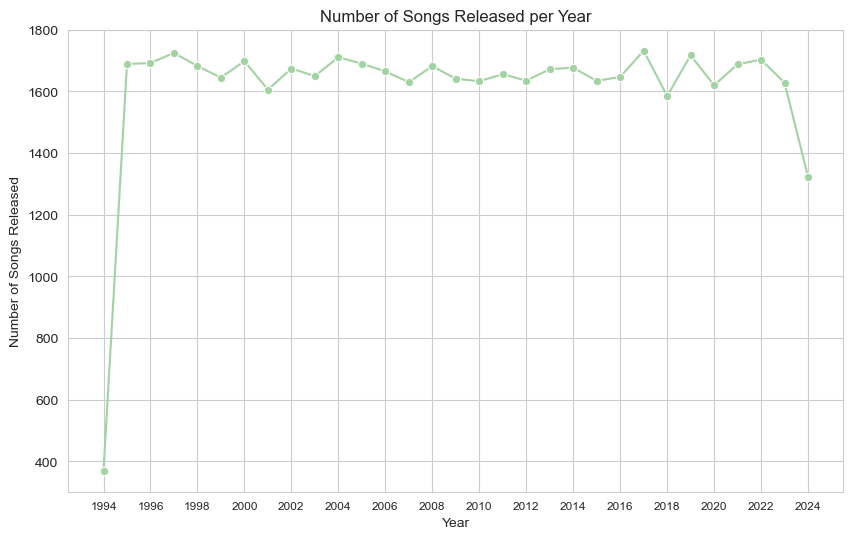

In [844]:
# Extract the year from the release_date
df['release_year'] = df['release_date'].dt.year

# Count the number of songs released each year
songs_per_year = df['release_year'].value_counts().sort_index()

# Create a time series plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=songs_per_year.index, y=songs_per_year.values, marker='o', color= '#A3D2A3')

plt.title('Number of Songs Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.xticks(np.arange(df['release_year'].min(), df['release_year'].max()+1, 2), size= 8.5)

plt.show()

The trend in annual song releases appears stable, though recent years show a slight decline, which is noteworthy. This could be linked to the effects of digitalization and global events like the pandemic on music production. While digital platforms have empowered independent artists to release more music, the pandemic may have slowed down creative output.

## <font color='#31DA7A'> <b>Top 10 Singers by Number of Songs</b><font color='black'> 

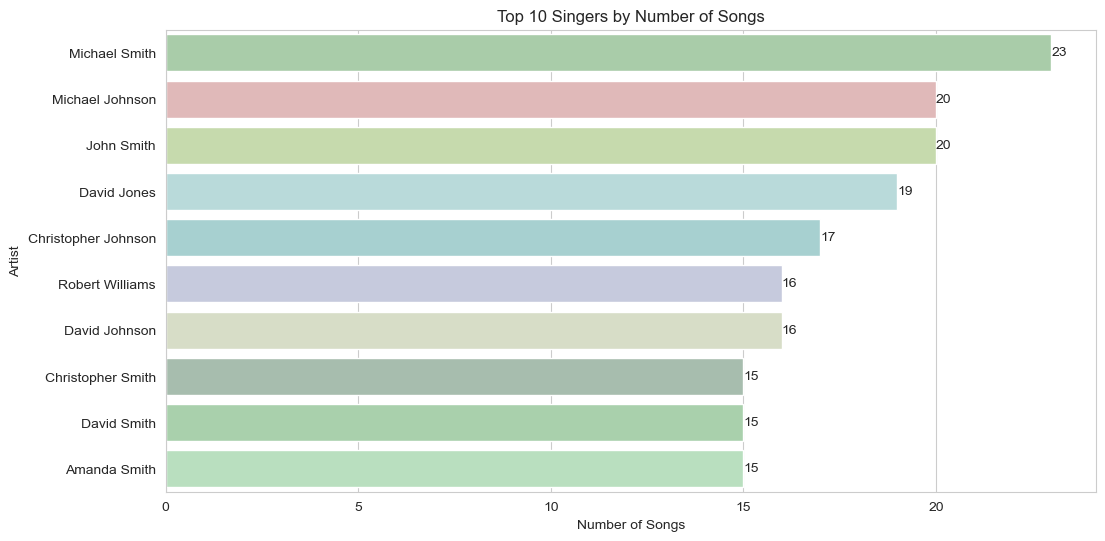

In [847]:
# Count the number of songs per artist
top_artists = df.groupby('artist').size().reset_index(name='song_count')
top_artists = top_artists.sort_values(by='song_count', ascending=False).head(10)  # Top 10 artists

# Create a bar chart for top artists
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='song_count',
                  y='artist',
                  data=top_artists,
                  palette= colors
                 )

for container in ax1.containers:
    ax1.bar_label(container)

plt.title('Top 10 Singers by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')

plt.show()

In the chart, **Michael Smith** leads with 23 songs, followed closely by **Michael Johnson and John Smith**, each with 20 songs. This data highlights the high productivity and activity levels of these artists within the music industry. The prevalence of artists named Michael suggests that certain names might be more common in the industry, or it could indicate data overlap, where individuals with similar names are aggregated.

Additionally, David and Christopher appear in various forms throughout the list, which might imply that artists with these names have managed to maintain a strong presence, engaging a loyal listener base through consistent production. Amanda Smith stands out as the only female artist in the top 10, potentially indicating fewer female artists producing at this high volume or a male-dominated top productivity tier.

## <font color='#31DA7A'> <b>Distribution of Languages of Songs</b><font color='black'> 

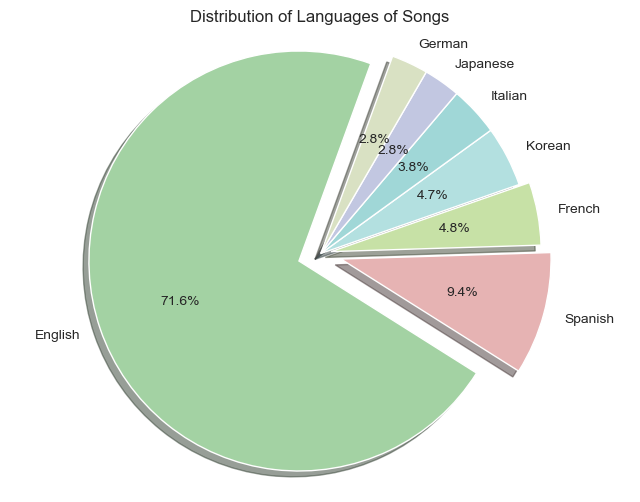

In [850]:
language_count = df.language.value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(language_count,
        labels=language_count.index,
        autopct='%1.1f%%',
        colors=colors,
        shadow= True,
        explode= [0.11, 0.1, 0.05, 0, 0, 0, 0],
        startangle= 70
       )

plt.title('Distribution of Languages of Songs')
plt.axis('equal')

plt.show()

**English, accounting for 61.9%, is the dominant language for songs**, emphasizing the global music market's preference for English content. Other languages like Spanish and French have smaller shares, indicating they cater to more niche audiences. English's dominance allows for broader international reach, showing that the music industry is largely converging around a single language, with artists favoring English to appeal to a global audience.

## <font color='#31DA7A'> <b>Popularity by Language</b><font color='black'> 

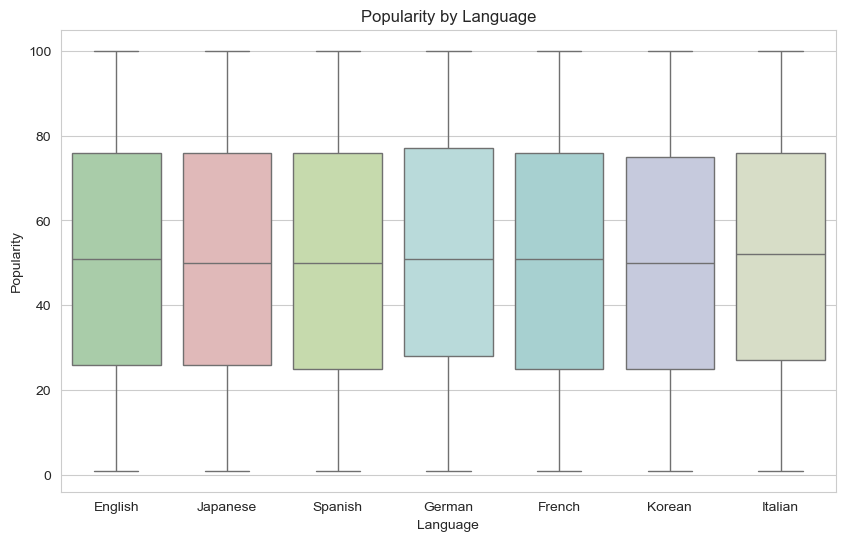

In [853]:
# Create a box plot for language vs. popularity
plt.figure(figsize=(10, 6))
sns.boxplot(x='language',
            y='popularity',
            data=df,
            palette= colors
           )

plt.title('Popularity by Language')
plt.xlabel('Language')
plt.ylabel('Popularity')

plt.show()

This box plot visualizes the popularity distribution of songs across different languages. It provides insights into how the popularity of songs varies across languages.

 - **Median Popularity:** The median popularity across languages is relatively similar, with values ranging between 40 and 60. This suggests that, on average, there is no significant difference in the popularity of songs between these languages.
 - **Range of Distribution:** The size of the boxes and the length of the whiskers indicate that the popularity scores have a wide distribution across most languages. Popularity ranges from 0 to 100 for all languages, and no extreme outliers are visible.
 - **Comparison of Languages:** Looking at the individual distributions, Japanese, Spanish, and Korean songs seem to have a slightly wider range of popularity scores. This indicates that songs in these languages may exhibit more variability in terms of how popular they are.

Overall, the differences in popularity between languages are not very pronounced, but some languages do show more diversity in their popularity distributions.

## <font color='#31DA7A'> <b>Top 10 Album With The Most Streamed In 2024</b><font color='black'> 

In [856]:
# Filtering albums released in 2024
df_2024 = df[df['release_year'] == 2024]

# Grouping albums according to the number of streams and getting the highest number of streams
top10_album = df_2024.groupby("album")["stream"].max().sort_values(ascending=False)[:10]
top10_album

album
Run Gas           99959819
Around            99850936
Successful        99683102
Usually Hotel     99646051
Risk              99363394
Way Discussion    99235057
Parent            99172958
Benefit           99146835
Particular His    99111953
Act               98986205
Name: stream, dtype: int64

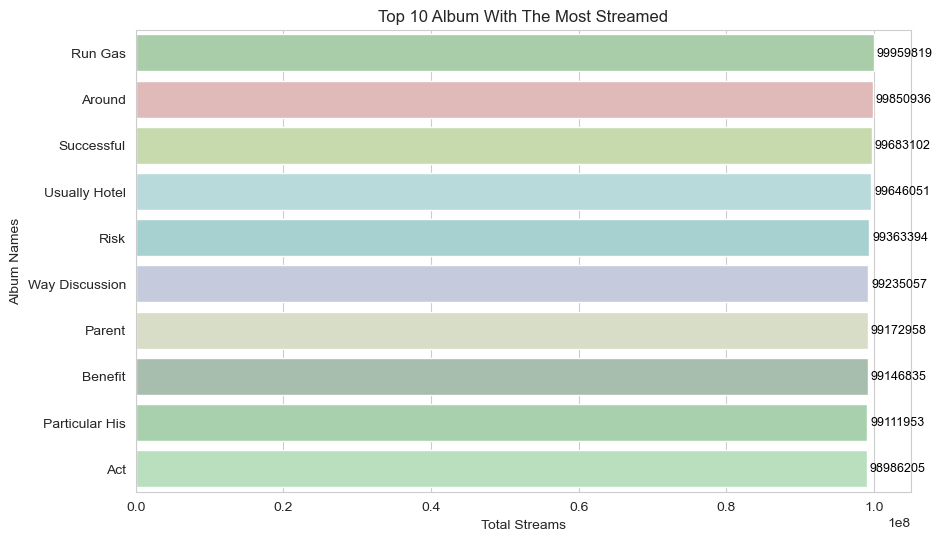

In [930]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax2 = sns.barplot(x=top10_album.values, y=top10_album.index, palette= colors)

for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=2)
    
ax2.set(xlabel='Total Streams', ylabel='Album Names')
plt.title("Top 10 Album With The Most Streamed")

plt.show()

**"Run Gas" leads with 99,959,819 streams**, followed closely by **"Around"** and **"Successful."** The high streaming numbers for these albums indicate that they have been successfully marketed, resonate with a broad audience, and likely hold a significant place in popular culture. The minimal differences in streams among the top albums suggest that these albums are all highly popular and effective in capturing listener attention, achieving similar levels of success.

## <font color='#31DA7A'> <b>Explicit Content Distribution</b><font color='black'> 

In [933]:
e_content = df.explicit_content.value_counts()
e_content

explicit_content
Yes    25083
No     24917
Name: count, dtype: int64

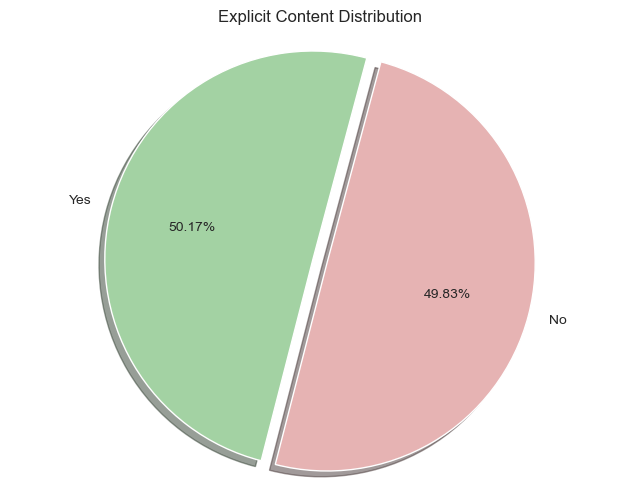

In [934]:
# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(e_content,
        labels=e_content.index,
        autopct='%1.2f%%',
        colors=colors,
        shadow= True,
        explode= [0.07, 0],
        startangle= 75
       )

plt.title('Explicit Content Distribution')
plt.axis('equal')

plt.show()

Songs with **explicit content slightly dominate at 50.17%**, showing that explicit songs are quite prevalent in the industry, almost equally balanced with clean content. This indicates a demand for bold and direct content, especially for younger and adult audiences, while also reflecting a conscious effort to produce age-appropriate content. The nearly equal split suggests a balance between edgy themes and broader accessibility.

## <font color='#31DA7A'> <b>Song Distribution of Record Labels</b><font color='black'> 

In [937]:
label_count = df.label.value_counts()
label_count

label
Def Jam             8501
Indie               8411
Sony Music          8394
Atlantic Records    8289
Warner Music        8243
Universal Music     8162
Name: count, dtype: int64

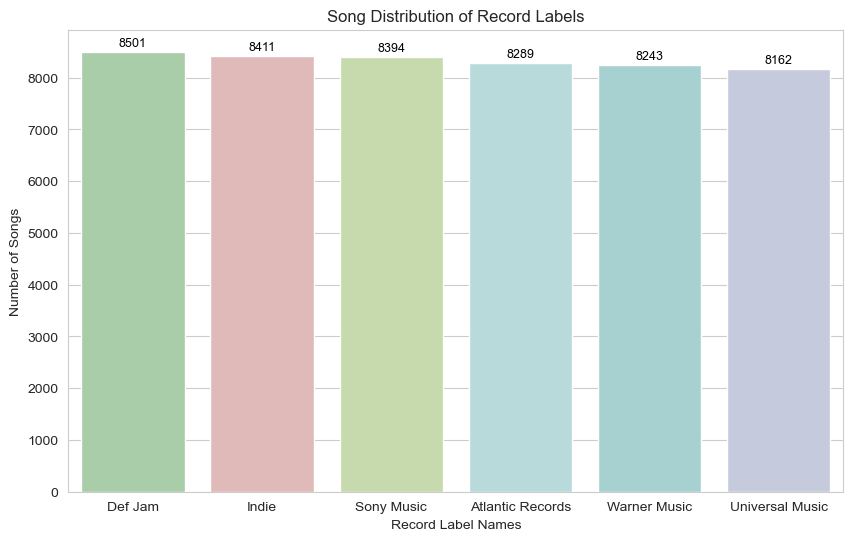

In [938]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax3 = sns.barplot(x=label_count.index, y=label_count.values, palette= colors)

for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=2)
    
ax3.set(xlabel='Record Label Names', ylabel='Number of Songs')
plt.title("Song Distribution of Record Labels")

plt.show()

**Def Jam leads with 8,501 songs**, followed by **Indie, Sony Music, Atlantic Records, and Warner Music**. The strong presence of major labels like Def Jam is expected, but Indie’s high ranking highlights the success of independent artists and smaller labels in competing on digital platforms. This suggests that indie artists have effectively found their audience and can hold their own alongside major labels.

## <font color='#31DA7A'> <b>Top 10 Composer by Number of Songs Released</b><font color='black'> 

In [941]:
top10_composer = df.composer.value_counts()[:10]
top10_composer

composer
Michael Smith       21
Michael Jones       21
Michael Williams    20
Robert Smith        19
John Smith          18
James Jones         17
Michael Davis       16
Jennifer Smith      15
Brian Smith         14
Jennifer Johnson    14
Name: count, dtype: int64

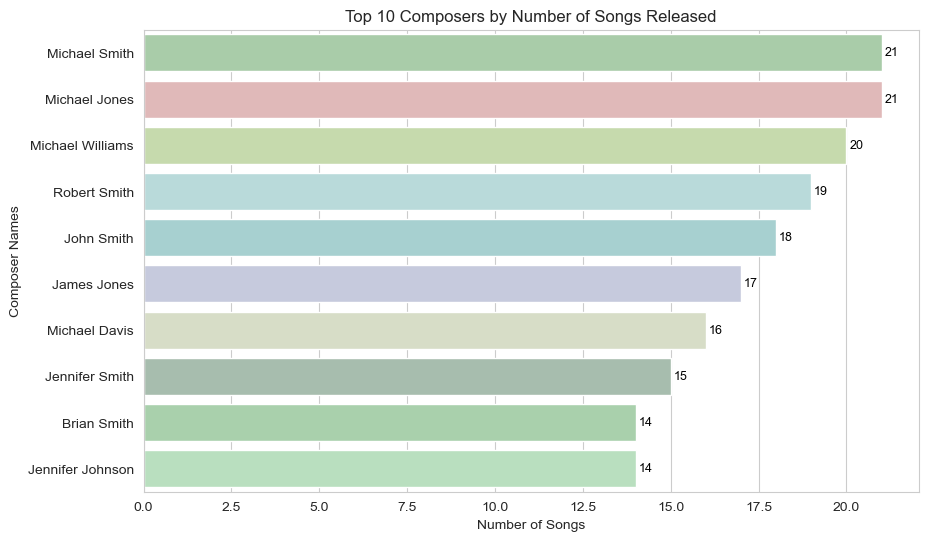

In [942]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax4 = sns.barplot(x=top10_composer.values, y=top10_composer.index, palette= colors)

for container in ax4.containers:
    ax4.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=2)
    
ax4.set(xlabel='Number of Songs', ylabel='Composer Names')
plt.title("Top 10 Composers by Number of Songs Released")

plt.show()

**Michael Smith** and **Michael Jones** lead with 21 songs each. The prevalence of composers with the name Michael suggests that common names might cause overlap, which requires careful analysis to accurately assess individual contributions. The inclusion of female composers like Jennifer Smith and Jennifer Johnson in the list shows a solid representation of women in composition, with these composers reaching a wide audience through high productivity.

## <font color='#31DA7A'> <b>Top 10 Producers by Number of Songs Released</b><font color='black'> 

In [945]:
top10_producers = df.producer.value_counts()[:10]
top10_producers

producer
Michael Smith        27
Michael Johnson      18
Christopher Smith    16
James Johnson        16
John Brown           14
Jennifer Johnson     14
Jennifer Smith       13
Amanda Smith         13
James Smith          13
David Johnson        13
Name: count, dtype: int64

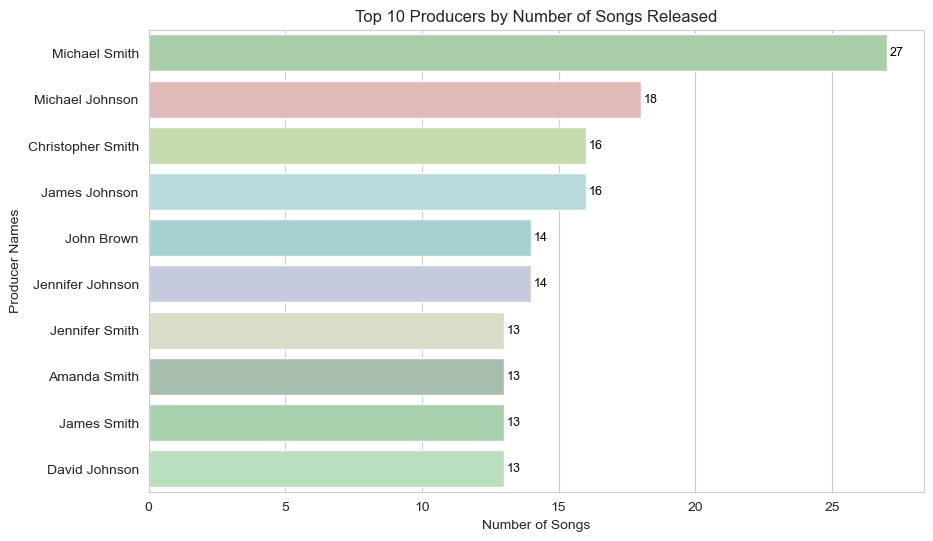

In [946]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax5 = sns.barplot(x=top10_producers.values, y=top10_producers.index, palette= colors)

for container in ax5.containers:
    ax5.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=2)
    
ax5.set(xlabel='Number of Songs', ylabel='Producer Names')
plt.title("Top 10 Producers by Number of Songs Released")

plt.show()

**Michael Smith leads with 27 songs**, followed by **Michael Johnson** and **Christopher Smith**. The repetition of names like "Michael" and "Smith" suggests name overlaps, which should be carefully distinguished in data analysis to avoid confusion. The presence of female producers like Jennifer Johnson and Amanda Smith signifies active female representation in production, with these high-producing figures making a lasting impact in the music industry.

## <font color='#31DA7A'> <b>Most Collaborated Artists</b><font color='black'> 

In [949]:
collab_count = df.collaboration.value_counts()[1:11] # excluding "No Collaboration" values
collab_count

collaboration
James Miller        7
Michael Williams    7
David Smith         7
Michael Smith       7
Jennifer Brown      7
Michael Johnson     6
Melissa Smith       6
Jennifer Miller     6
William Lopez       6
Michael Wilson      6
Name: count, dtype: int64

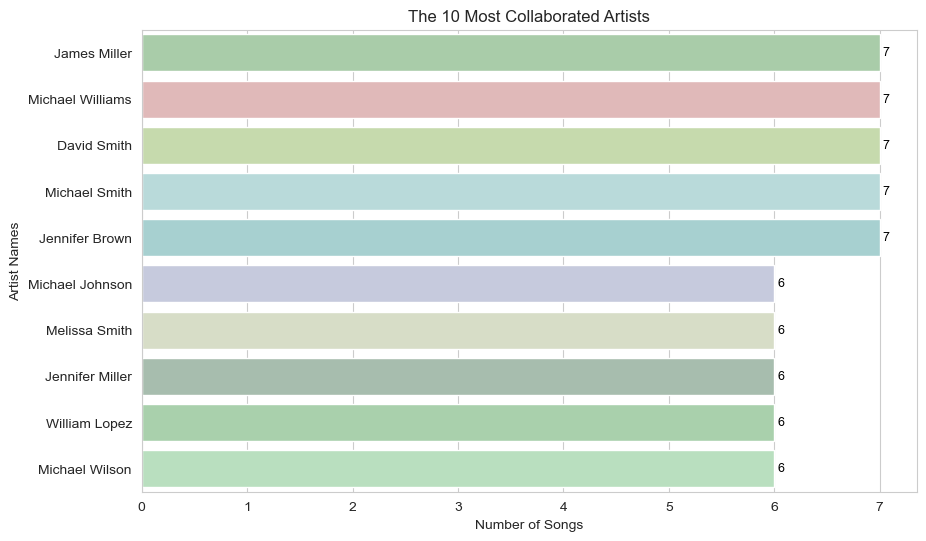

In [950]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax6 = sns.barplot(x=collab_count.values, y=collab_count.index, palette= colors)

for container in ax6.containers:
    ax6.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=2)
    
ax6.set(xlabel='Number of Songs', ylabel='Artist Names')
plt.title("The 10 Most Collaborated Artists")

plt.show()

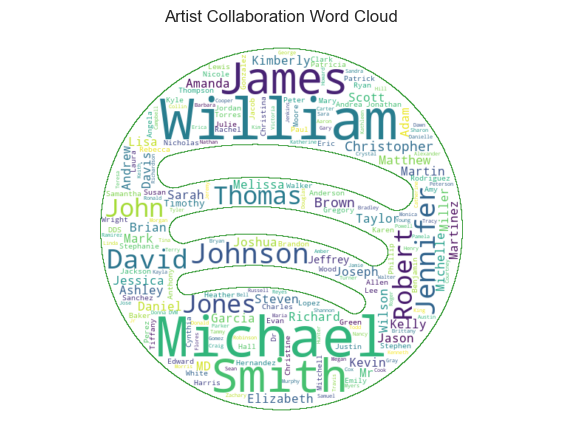

In [951]:
from wordcloud import WordCloud
from PIL import Image

# Removing values ​​with "No Collaboration"
filtered_df = df[df['collaboration'] != "No Collaboration"]

# Combining all artist names
all_artists = ', '.join(filtered_df['collaboration'].tolist())

# Converting spotify logo into a mask
mask = np.array(Image.open('spotify_logo.jpg'))
mask = np.invert(mask)

# Identifying white areas on the mask
mask[mask > 128] = 255  # White areas
mask[mask <= 128] = 0 # Black areas

# Creating WordCloud
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      mask=mask, 
                      contour_color='green', 
                      contour_width=1).generate(all_artists)

# Showing
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Artist Collaboration Word Cloud")

plt.show()

Artists like **James Miller, Michael Williams, and David Smith** lead with **7 collaborations each**. This high collaboration count suggests they are well-connected and actively networked in the industry. With the support of a wordcloud, this chart visually reinforces the network and reach of these artists, highlighting their influence across various music projects and genres. Their frequent collaborations expand their reach and presence within the industry.

<a id='conclusion'></a>
# <font color='#24C06A'> <b>Conclusion</b><font color='black'> 

In this project, various data preparation and visualization steps were conducted to gain deeper insights into the music industry data. Initially, the dataset was examined to understand its structure, columns were refined, and NaN (missing) values were filled with appropriate methods. This data preparation process was crucial for ensuring the accuracy of the analyses and obtaining reliable results.

Following this, data visualization was performed, allowing key insights to be conveyed through different charts. Visualizations of categories such as the most-streamed albums, explicit content distribution, song distribution by record labels, top composers and producers by song count, and the most-collaborated artists provided significant findings about the music industry’s structure. These analyses highlighted the productivity of artists, the positioning of record labels in the sector, and listener inclinations towards explicit content.

The box plot examining song popularity across languages revealed that popularity distribution is relatively similar across languages. However, songs in Japanese, Spanish, and Korean showed a slightly wider popularity range, indicating more variability in popularity for songs in these languages. Overall, differences in popularity among languages were not very pronounced.

This project demonstrates the effectiveness and importance of data preparation and visualization in analyzing music data. The findings offer valuable insights into various aspects of the music industry and establish a solid foundation for future analyses.

<p style="background-color:#198D4B;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THANK YOU!</b></p>